In [1]:
import pandas as pd                    
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("C:\\Users\\SHAIKH MD KASHIF\\Downloads\\Dataset.xlsx - Sheet1.csv")
data.head()                         ### Loading the Data 

,question
0,"Six letters, A, P, K, U, W and N, are written ..."
1,Gaurav exits from the backdoor of his north-fa...
2,Select the option figure in which the given fi...
3,PSQ' means 'P is to the north of Q . <br>'P&a...
4,The sequence of folding a piece of paper and t...


In [4]:
data.describe()

,question
count,214
unique,214
top,"Six letters, A, P, K, U, W and N, are written ..."
freq,1


In [5]:
data.info()                                         #### Checking the No of Rows ,Col & Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  214 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


# Text Preprocessing :-

# Text Cleaning

1) Removing of Punctuations

In [6]:
import nltk 
import re                                    ## - REMOVING OF PUNCTUATIONS
from nltk.corpus import stopwords            ## - Removing of Stopwords 
from nltk.stem import PorterStemmer          ## - Stemming
ps=PorterStemmer()

In [7]:
import re
corpus=[]
for i in range(len(data)):
    rp=re.sub('[^a-zA-Z]'," ",data["question"][i])
    corpus.append(rp)
print(corpus)

['Six letters  A  P  K  U  W and N  are written on different faces of a dice  Two positions of this dice are shown  Select the letter that will be on the face opposite to the one having N  https   cracku in media uploads Screenshot     n slYir png ', 'Gaurav exits from the backdoor of his north facing house and walk    m straight  then he takes a left turn and walk    m  then he turns left and walks    m  He turns left again and walk    m  How far and in which direction is he from his house now ', 'Select the option figure in which the given figure is embedded  rotation is NOT allowed   https   media cdn cracku in uploads Screenshot     l Bnf M png ', 'PSQ  means  P is to the north of Q     br  P amp Q  means  P is to the east of Q      br  P Q  means  Q is to the west of P      br  P Q  means  Q is to the south of P     br  P QR  means  P stands exactly in the middle of horizontal line QR     br  P QR  means  P stands exactly in the middle of vertical line QR     br Note   P mSQ  mean

2) Removing of Stopwords

In [8]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
corpus=[]                         # Cleaning of the Text Data Under a Corpus -
for i in range(len(data)):
    rp=re.sub('[^a-zA-Z]'," ",data["question"][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[word for word in rp if not word in stopwords.words("english")]
    rp= " ".join(rp)
    corpus.append(rp)
    
print(corpus)

['six letters p k u w n written different faces dice two positions dice shown select letter face opposite one n https cracku media uploads screenshot n slyir png', 'gaurav exits backdoor north facing house walk straight takes left turn walk turns left walks turns left walk far direction house', 'select option figure given figure embedded rotation allowed https media cdn cracku uploads screenshot l bnf png', 'psq means p north q br p amp q means p east q br p q means q west p br p q means q south p br p qr means p stands exactly middle horizontal line qr br p qr means p stands exactly middle vertical line qr br note p msq means p north q br find shortest distance g c following expression br c mss g amp j k jt', 'sequence folding piece paper manner folded paper cutis shown following figures would paper look unfolded https media cdn cracku uploads screenshot xq x r png', 'sequence folding piece paper manner folded paper cut shown following figures would paper look unfolded https media cdn

3) Either we have to go with Stemming "or" Lemmatization 

In [10]:
from nltk.stem import PorterStemmer         # Example for Stemming -
ps=PorterStemmer()                          # STEMMING may or may not have meaningful words -         
ps.stem("history")                           # Without Human Interaction such as IOT Sensors-

'histori'

In [11]:
from nltk.stem import WordNetLemmatizer         # Example for Lemmatization -
wnl=WordNetLemmatizer()                        # LEMMATIZATION cumpolsory give the Meaning words -     
wnl.lemmatize("history")                        # For Human-Interaction we must go for Lemmatization

'history'

# All in one Cell :-

In [12]:
corpus=[]                     # Here we should go with Stemming because there is Not a Human-Interaction.
for i in range(len(data)):
    rp=re.sub('[^a-zA-Z]'," ",data["question"][i])
    rp=rp.lower()
    rp=rp.split()   
    rp=[ps.stem(word)for word in rp if not word in stopwords.words("english")]
    rp=" ".join(rp)
    corpus.append(rp)
print(corpus)

['six letter p k u w n written differ face dice two posit dice shown select letter face opposit one n http cracku media upload screenshot n slyir png', 'gaurav exit backdoor north face hous walk straight take left turn walk turn left walk turn left walk far direct hous', 'select option figur given figur embed rotat allow http media cdn cracku upload screenshot l bnf png', 'psq mean p north q br p amp q mean p east q br p q mean q west p br p q mean q south p br p qr mean p stand exactli middl horizont line qr br p qr mean p stand exactli middl vertic line qr br note p msq mean p north q br find shortest distanc g c follow express br c mss g amp j k jt', 'sequenc fold piec paper manner fold paper cuti shown follow figur would paper look unfold http media cdn cracku upload screenshot xq x r png', 'sequenc fold piec paper manner fold paper cut shown follow figur would paper look unfold http media cdn cracku upload screenshot iuqhnyx png', 'six letter b c e f written differ face dice two p

# Vectorization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus)

# Modelling using LDA (Latent Dirichlet Allocation)

In [14]:
from sklearn.decomposition import LatentDirichletAllocation
model=LatentDirichletAllocation(n_components=4)
model.fit(X)

LatentDirichletAllocation(n_components=4)

In [15]:
topic_results=model.transform(X)

In [16]:
topic_results[0]

array([0.01100186, 0.966851  , 0.01109692, 0.01105022])

In [17]:
topic_results[0].argmax()

1

This means that our model thinks that the first Question belongs to topic #2 "Cluster.

# Combining with the Original Data

In [18]:
data["group"]=topic_results.argmax(axis=1)

In [19]:
data.head()

,question,group
0,"Six letters, A, P, K, U, W and N, are written ...",1
1,Gaurav exits from the backdoor of his north-fa...,0
2,Select the option figure in which the given fi...,1
3,PSQ' means 'P is to the north of Q . <br>'P&a...,1
4,The sequence of folding a piece of paper and t...,2


In [20]:
data["group"].unique()

array([1, 0, 2, 3], dtype=int64)

# Showing the Top words Per Topic

In [21]:
for index,topic in enumerate(model.components_):
    print(f' THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

 THE TOP 10 WORDS FOR TOPIC #0
['third', 'toward', 'person', 'immedi', 'walk', 'face', 'turn', 'right', 'left', 'sit']


 THE TOP 10 WORDS FOR TOPIC #1
['figur', 'face', 'given', 'screenshot', 'select', 'upload', 'media', 'http', 'png', 'cracku']


 THE TOP 10 WORDS FOR TOPIC #2
['follow', 'cracku', 'png', 'http', 'media', 'upload', 'would', 'figur', 'fold', 'paper']


 THE TOP 10 WORDS FOR TOPIC #3
['said', 'cube', 'two', 'sister', 'mother', 'brother', 'father', 'daughter', 'relat', 'son']




In [22]:
data["question"][0]

'Six letters, A, P, K, U, W and N, are written on different faces of a dice. Two positions of this dice are shown. Select the letter that will be on the face opposite to the one having N. https://cracku.in/media/uploads/Screenshot_305_n1slYir.png '

In [23]:
data[data["group"]==3].head()

,question,group
10,"D is the son of C and the brother of E, who is...",3
11,"There is a family of five members: K, L, M,N a...",3
14,"In a family of seven persons, B is the brother...",3
15,"P, L, T, B, N and D are six members of a busin...",3
19,P is the father of Q and the grandfather of R....,3


In [24]:
data[data["group"]==2].head()

,question,group
4,The sequence of folding a piece of paper and t...,2
5,The sequence of folding a piece of paper and t...,2
7,The sequence of folding a piece of paper and t...,2
20,The sequence of folding a piece of paper and t...,2
25,The sequence of folding a piece of paper and t...,2


In [25]:
data[data["group"]==0].head()

,question,group
1,Gaurav exits from the backdoor of his north-fa...,0
9,Jahnavi is the sister of Taruni. Taruni is mar...,0
16,Shweta starts walking from her office and walk...,0
21,"Six friends, David, Bhanu, Minto, Krita, John ...",0
22,"Eight north-facing restaurants named P, Q, R, ...",0


In [26]:
data[data["group"]==1].head()

,question,group
0,"Six letters, A, P, K, U, W and N, are written ...",1
2,Select the option figure in which the given fi...,1
3,PSQ' means 'P is to the north of Q . <br>'P&a...,1
6,"Six letters A, B, C, D, E and F are written on...",1
8,Select the option figure in which the given fi...,1


# Create a mapping of cluster numbers to representative labels:-

In [27]:
cluster_labels = {
    0: "Paper Folding Puzzels",
    1: "Family & Relationship Descriptive",
    2: "Visual Patterns Recognization",
    3: "Arrangement & Movement Scenarios"
}
data["group_task"] = data["group"].map(cluster_labels)


In [28]:
data.head()

,question,group,group_task
0,"Six letters, A, P, K, U, W and N, are written ...",1,Family & Relationship Descriptive
1,Gaurav exits from the backdoor of his north-fa...,0,Paper Folding Puzzels
2,Select the option figure in which the given fi...,1,Family & Relationship Descriptive
3,PSQ' means 'P is to the north of Q . <br>'P&a...,1,Family & Relationship Descriptive
4,The sequence of folding a piece of paper and t...,2,Visual Patterns Recognization


# Visualization of Cluster's :-

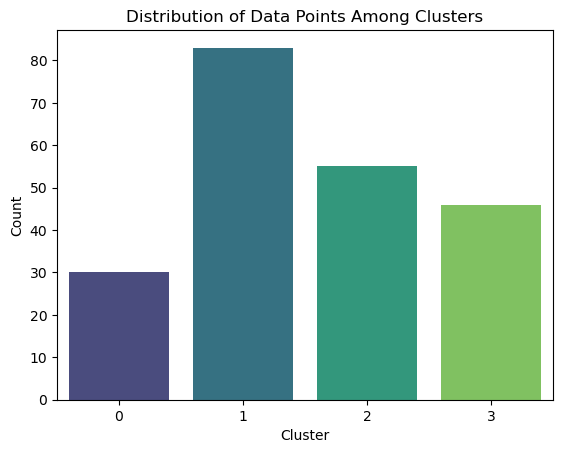

In [29]:
sns.countplot(data=data,x='group', palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of Data Points Among Clusters')
plt.show()


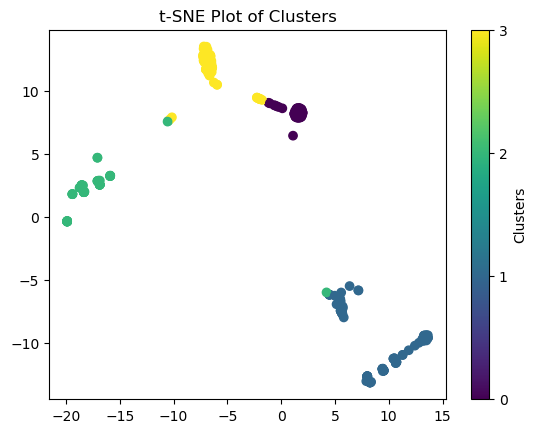

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'topic_results' contains your transformed data
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(topic_results)

# Create a scatter plot of the t-SNE results with colors representing clusters
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data["group"], cmap="viridis")
plt.colorbar(ticks=[0, 1, 2, 3], label="Clusters")
plt.title("t-SNE Plot of Clusters")
plt.show()


# Validating the Quality of the Cluster Using Calinski-Harabasz Index : -

In [32]:
from sklearn.metrics import calinski_harabasz_score
X_dense = X.toarray()
ch_score = calinski_harabasz_score(X_dense, data["group"])
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 28.025277421762404


The Calinski-Harabasz Index (CHI) score of approximately 28.03

That suggests the clusters have relatively good separation and that the clustering quality is reasonable.